<a href="https://colab.research.google.com/github/Soumdeb/IDEAS_TIHub_Final_Project_Submission/blob/main/Copy_of_02_exploratory_data_analysis_with_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

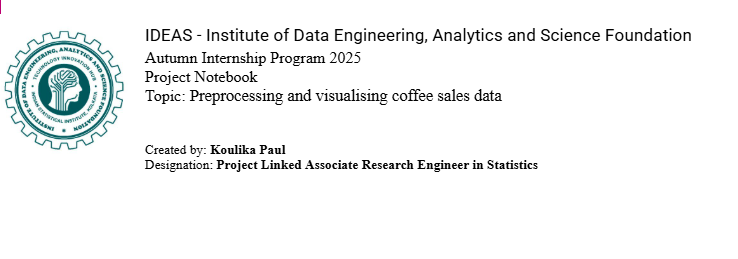

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
coffee_data=pd.read_csv("/content/drive/MyDrive/Coffe_sales.csv")
coffee_data

Mounted at /content/drive


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Q1. Find the number of columns, duplicate columns, and missing values**

In [ ]:
num_columns = coffee_data.shape[1]
duplicate_columns = coffee_data.T.duplicated().sum()
missing_values = coffee_data.isnull().sum()

print("Number of columns:", num_columns)
print("Number of duplicate columns:", duplicate_columns)
print("\nMissing values per column:\n", missing_values)

Number of columns: 11
Number of duplicate columns: 0

Missing values per column:
 hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


***Basic statistics of the data***

In [ ]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [ ]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [ ]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date'])
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')

***Average money for each year***

In [ ]:
grouped_data = coffee_data.groupby('Year')['money'].agg("mean")
grouped_data

,money
Year,
2024,31.737634
2025,31.390011


**Q2. Find the datatype of grouped_data**

In [ ]:
print("\nType of grouped_data:", type(grouped_data))
print("Dtype of grouped_data values:", grouped_data.dtypes)


Type of grouped_data: <class 'pandas.core.series.Series'>
Dtype of grouped_data values: float64


**Q3. Find the maximum money for each month**

In [ ]:
max_money_per_month_df = coffee_data.groupby('Month', as_index=False)['money'].max()
max_money_per_month_df.rename(columns={'money': 'Max_Money'}, inplace=True)

print("\nMaximum Money per Month:\n", max_money_per_month_df)


Maximum Money per Month:
     Month  Max_Money
0       1      35.76
1       2      35.76
2       3      38.70
3       4      38.70
4       5      37.72
5       6      37.72
6       7      37.72
7       8      32.82
8       9      35.76
9      10      35.76
10     11      35.76
11     12      35.76


***Distribution of money over months***

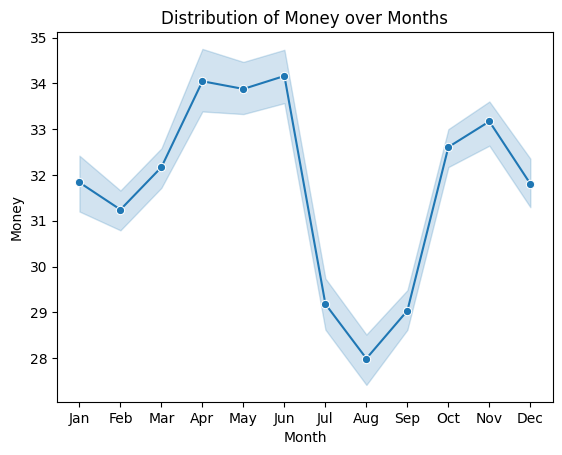

In [ ]:
sns.lineplot(x="Monthsort", y="money", data=coffee_data, marker="o")
plt.xticks(coffee_data["Monthsort"].unique(), coffee_data["Month_name"].unique())
plt.xlabel("Month")
plt.ylabel("Money")
plt.title("Distribution of Money over Months")
plt.show()

***The density of money over years***

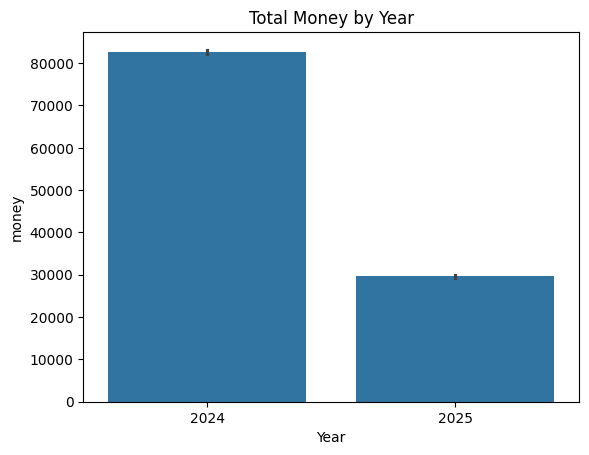

In [ ]:
coffee_data["Year"] = pd.to_datetime(coffee_data["Date"]).dt.year
sns.barplot(x="Year", y="money", data=coffee_data, estimator="sum")
plt.title("Total Money by Year")
plt.show()


**Q4. Find the distribution of money over coffee names**


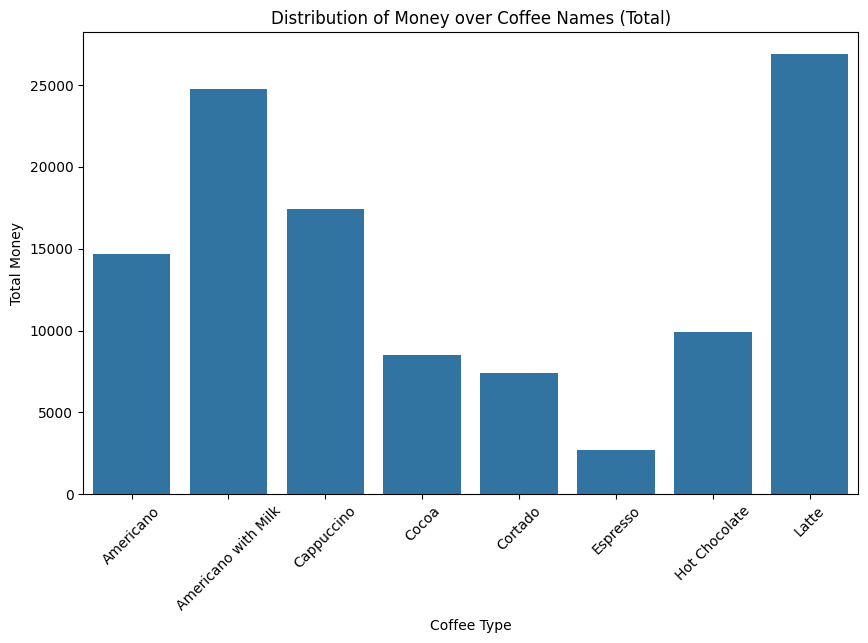


Total Money per Coffee Type:
            coffee_name     money
0            Americano  14650.26
1  Americano with Milk  24751.12
2           Cappuccino  17439.14
3                Cocoa   8521.16
4              Cortado   7384.86
5             Espresso   2690.28
6        Hot Chocolate   9933.46
7                Latte  26875.30


In [ ]:
money_by_coffee = coffee_data.groupby('coffee_name', as_index=False)['money'].sum()

plt.figure(figsize=(10,6))
sns.barplot(x="coffee_name", y="money", data=money_by_coffee)
plt.xticks(rotation=45)
plt.title("Distribution of Money over Coffee Names (Total)")
plt.xlabel("Coffee Type")
plt.ylabel("Total Money")
plt.show()

print("\nTotal Money per Coffee Type:\n", money_by_coffee)



***Times of the Day the dataset holds***

In [ ]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


**Q5. How many types of coffees are present in the dataset?**

In [ ]:
num_coffee_types = coffee_data['coffee_name'].nunique()

print("Number of coffee types in dataset:", num_coffee_types)

Number of coffee types in dataset: 8


***Max money from coffee_name***

In [ ]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


**Q6. Find the average money made at what time of the day.**

In [ ]:
avg_money_time_of_day = coffee_data.groupby('Time_of_Day')['money'].mean()

print("Average money made at each time of the day:")
print(avg_money_time_of_day)

Average money made at each time of the day:
Time_of_Day
Afternoon    31.643187
Morning      30.422693
Night        32.890904
Name: money, dtype: float64


***Generate 100 synthetic data rows***

In [ ]:
date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")

synthetic_data = pd.DataFrame({
    "Date": date_range,
    "coffee_name": np.random.choice(coffee_data["coffee_name"].unique(), size=100),
    "money": np.random.randint(50, 500, size=100),
    "Time_of_Day": np.random.choice(coffee_data["Time_of_Day"].unique(), size=100)
})


synthetic_data["Month"] = synthetic_data["Date"].dt.month
synthetic_data["Year"] = synthetic_data["Date"].dt.year

combined_data = pd.concat([coffee_data, synthetic_data], ignore_index=True)

print("Original data shape:", coffee_data.shape)
print("After adding synthetic rows:", combined_data.shape)

Original data shape: (3547, 13)
After adding synthetic rows: (3647, 13)


**Q7. Insert synthetic data into the given data set and analyse as above.**

In [ ]:
avg_money_per_year = combined_data.groupby("Year")["money"].mean()
print("\nAverage money per year:\n", avg_money_per_year)

max_money_per_month = combined_data.groupby("Month")["money"].max()
print("\nMax money per month:\n", max_money_per_month)

money_by_coffee = combined_data.groupby("coffee_name")["money"].sum()
print("\nTotal money by coffee type:\n", money_by_coffee)

avg_money_time = combined_data.groupby("Time_of_Day")["money"].mean()
print("\nAverage money by time of day:\n", avg_money_time)


Average money per year:
 Year
2023    280.680000
2024     31.737634
2025     31.390011
Name: money, dtype: float64

Max money per month:
 Month
1     498.00
2     486.00
3     491.00
4     497.00
5      37.72
6      37.72
7      37.72
8      32.82
9      35.76
10     35.76
11     35.76
12     35.76
Name: money, dtype: float64

Total money by coffee type:
 coffee_name
Americano              19616.26
Americano with Milk    27788.12
Cappuccino             21070.14
Cocoa                  12089.16
Cortado                11040.86
Espresso                5521.28
Hot Chocolate          11883.46
Latte                  31304.30
Name: money, dtype: float64

Average money by time of day:
 Time_of_Day
Afternoon    39.069164
Morning      35.947229
Night        40.411508
Name: money, dtype: float64
